# **Economic Development vs. Sustainability**
# Data Cleaning - CO_2 Emissions
Katlyn Goeujon-Mackness <br>
Last Updated: 18/06/2025

## Introduction

Economic growth is often pursued at the cost of environmental sustainability. This study aims to analyze the balance between economic development and sustainable practices across different regions, industries, and policies.

In this **data cleaning phase**, we will refine and structure the dataset by handling missing values, removing redundant entries, and ensuring consistency in country classifications and ISO codes. This process will improve data quality, enabling accurate analysis. Once cleaned, we will export the processed dataset in CSV format for further exploration.

### Key Challenge
Achieving sustainable economic growth requires balancing financial prosperity with environmental and social responsibility. Identifying actionable patterns in historical data can inform policymakers, businesses, and environmental advocates.

### Data of Interest
- GDP growth rate compared to carbon emissions per capita.
- Percentage of renewable energy adoption.
- Employment trends in green industries.
- Improvement in environmental quality indicators (air quality, water safety).
- Sustainability index scores vs. economic performance.

### Locating Relevant Data
- **World Bank**: Economic indicators.
    * [GDP per capita growth (annual %)](https://data.worldbank.org/indicator/NY.GDP.PCAP.KD.ZG)
    * [GDP per capita (constant 2015 US$)](https://data.worldbank.org/indicator/NY.GDP.PCAP.KD)
- **Our World in Data**: Environmental indicators and population data
    * [CO2 and Greenhouse Gas Emissions](https://github.com/owid/co2-data)
    * [Historical and Projected Population](https://ourworldindata.org/population-sources) 
- **United Nations SDGs Database**: Sustainable development statistics.
- **OECD**: Policy effectiveness on sustainability.
- **NASA Earth Observations**: Environmental impact metrics.
- **National Employment Data**: Job growth in sustainable sectors.

In [903]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore

# Prevent truncating columns and rows
pd.set_option("display.max_rows", None) 
pd.set_option("display.max_columns", None) 

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [904]:
# Datasets by country
co2_by_country = pd.read_csv("../data/in_process/1b_co2_by_country_structured.csv")
gdp_by_country = pd.read_csv("../data/in_process/1a_gdp_by_country_structured.csv")

# Datasets by groups
co2_by_groups = pd.read_csv("../data/in_process/1b_co2_by_groups_structured.csv")
gdp_by_groups = pd.read_csv("../data/in_process/1a_gdp_by_groups_structured.csv")


In [905]:
co2_by_country.head(3)

,Unnamed: 0,country,Country Code,year,population,gdp,co2,co2_per_capita,co2_per_gdp,co2_per_unit_energy,energy_per_gdp
0,0,Afghanistan,AFG,1960,9035048.0,1.303325e+10,0.414,0.046,0.032,NaN,NaN
1,1,Afghanistan,AFG,1961,9214082.0,1.314629e+10,0.491,0.053,0.037,NaN,NaN
2,2,Afghanistan,AFG,1962,9404411.0,1.336763e+10,0.689,0.073,0.052,NaN,NaN


In [906]:
gdp_by_country.head(3)

,Country Name,Country Code,Year,GDPAnnualPercent,GDPConstantUSD
0,Afghanistan,AFG,1960,NaN,NaN
1,Afghanistan,AFG,1961,NaN,NaN
2,Afghanistan,AFG,1962,NaN,NaN


In [907]:
co2_by_groups.head(3)

,Unnamed: 0,Region/Group,Country Code,year,population,gdp,co2,co2_per_capita,co2_per_gdp,co2_per_unit_energy,energy_per_gdp
0,484,Africa,AFR,1960,283922289.0,NaN,156.567,0.552,0.345,NaN,NaN
1,485,Africa,AFR,1961,290814083.0,NaN,161.994,0.558,0.349,NaN,NaN
2,486,Africa,AFR,1962,297959967.0,NaN,166.335,0.559,0.346,NaN,NaN


In [908]:
gdp_by_groups.head(3)

,Country Code,Region Group Name,Year,GDPAnnualPercent,GDPConstantUSD
0,AFE,Africa Eastern and Southern,1960,NaN,1172.316285
1,AFE,Africa Eastern and Southern,1961,-2.136630,1147.268217
2,AFE,Africa Eastern and Southern,1962,5.009835,1204.744460


## CO_2 Data by Country
### Missing Data
There is significant amouts of data missing. We will investigate patterns in the missing data to decide on a strategy.

In [909]:
co2_by_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13312 entries, 0 to 13311
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           13312 non-null  int64  
 1   country              13312 non-null  object 
 2   Country Code         13312 non-null  object 
 3   year                 13312 non-null  int64  
 4   population           13312 non-null  float64
 5   gdp                  9999 non-null   float64
 6   co2                  12786 non-null  float64
 7   co2_per_capita       12786 non-null  float64
 8   co2_per_gdp          9887 non-null   float64
 9   co2_per_unit_energy  9120 non-null   float64
 10  energy_per_gdp       7683 non-null   float64
dtypes: float64(7), int64(2), object(2)
memory usage: 1.1+ MB


In [910]:
# Missing data found - check how many exactly
print(co2_by_country.isnull().sum())

Unnamed: 0                0
country                   0
Country Code              0
year                      0
population                0
gdp                    3313
co2                     526
co2_per_capita          526
co2_per_gdp            3425
co2_per_unit_energy    4192
energy_per_gdp         5629
dtype: int64


In [911]:
# Drop redundant index column
co2_by_country = co2_by_country.drop(columns=["Unnamed: 0"])

# Rename columns for consistency with GDP data
co2_by_country = co2_by_country.rename(columns={
    "country": "Country Name",
    "year": "Year",
    "population": "Population",
    "co2": "CO2"
})
co2_by_country.head(3)

,Country Name,Country Code,Year,Population,gdp,CO2,co2_per_capita,co2_per_gdp,co2_per_unit_energy,energy_per_gdp
0,Afghanistan,AFG,1960,9035048.0,1.303325e+10,0.414,0.046,0.032,NaN,NaN
1,Afghanistan,AFG,1961,9214082.0,1.314629e+10,0.491,0.053,0.037,NaN,NaN
2,Afghanistan,AFG,1962,9404411.0,1.336763e+10,0.689,0.073,0.052,NaN,NaN


In [912]:
# We can remove gdp-related columns from the OWID data 
#   because we will join with the World Bank data in the Joining phase
# Drop co2_per_unit_energy and co2_per_capita because these can be calculated later
co2_by_country = co2_by_country.drop(['gdp', 'co2_per_gdp', 'energy_per_gdp', 'co2_per_unit_energy', 'co2_per_capita'], axis=1)
print(co2_by_country.isnull().sum())

Country Name      0
Country Code      0
Year              0
Population        0
CO2             526
dtype: int64


In [913]:
# Investigate the missing co2 data
missing_co2 = co2_by_country[co2_by_country['CO2'].isnull()]
display(missing_co2.groupby('Country Name')['Year'].count().sort_values(ascending=False))

Country Name
Monaco                      64
San Marino                  64
Eritrea                     34
Kosovo                      34
Timor-Leste                 34
Marshall Islands            32
Micronesia, Fed. Sts.       32
Namibia                     31
Turks and Caicos Islands    30
West Bank and Gaza          30
Lesotho                     30
Tuvalu                      30
Andorra                     30
Botswana                    12
Maldives                    11
Bhutan                      10
Nauru                        4
Oman                         4
Seychelles                   3
British Virgin Islands       2
Eswatini                     2
Vanuatu                      2
Kiribati                     1
Name: Year, dtype: int64

#### Comments
Missing CO_2 data is minimal and can be safely dropped for this analysis.

In [914]:
co2_by_country = co2_by_country.dropna(subset=['CO2'])
print(co2_by_country.isnull().sum())

Country Name    0
Country Code    0
Year            0
Population      0
CO2             0
dtype: int64


### Duplicated Data

In [915]:
# Search for duplicate data
duplicates = co2_by_country[co2_by_country.duplicated()]
duplicates

,Country Name,Country Code,Year,Population,CO2


### Outliers

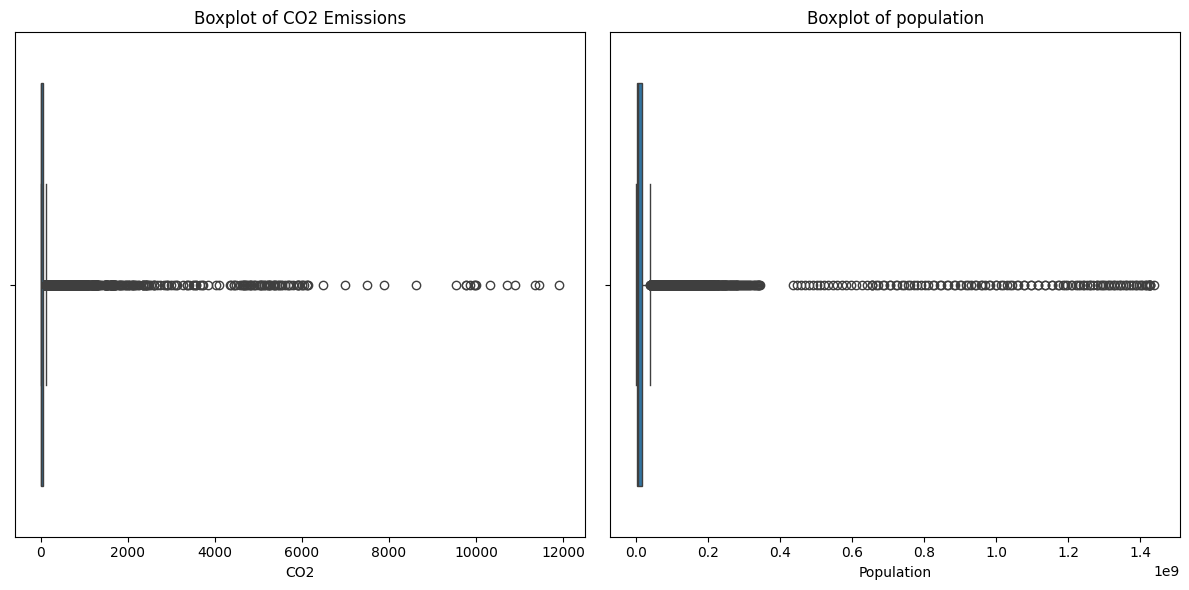

In [916]:
# Visual inspection of data patterns
fig, axes = plt.subplots(1,2, figsize=(12,6))
axes = axes.flatten()

# Boxplot for co2
sns.boxplot(data=co2_by_country, x='CO2', ax=axes[0])
axes[0].set_title('Boxplot of CO2 Emissions')

# Boxplot for population
sns.boxplot(data=co2_by_country, x='Population', ax=axes[1])
axes[1].set_title('Boxplot of population')

plt.tight_layout()
plt.show()

#### Comments
Both **boxplots** show heavy skew, which makes sense because some countries have vastly larger values than others. Most countries fall into the lower range. Plots are difficult to interpret without transformation, so log transformation will be tested.

### IQR Testing
The large number of outliers tells us that outlier testing is not enough on its own. Some countries are high emitters.

In [917]:
Q1 = co2_by_country['CO2'].quantile(0.25)
Q3 = co2_by_country['CO2'].quantile(0.75)
IQR = Q3 - Q1

co2_by_country['CO2 Outliers'] = (
    (co2_by_country['CO2'] < Q1 - 3 * IQR) | # Using an aggressive threshold
    (co2_by_country['CO2'] > Q1 + 3 * IQR)
)
co2_by_country[co2_by_country['CO2 Outliers']].groupby('Country Name').size()

Country Name
Algeria                      12
Argentina                    26
Australia                    55
Belgium                       5
Brazil                       50
Canada                       64
China                        64
Czechia                      26
Egypt, Arab Rep.             22
France                       64
Germany                      64
India                        61
Indonesia                    34
Iran, Islamic Rep.           48
Iraq                         11
Italy                        62
Japan                        64
Kazakhstan                   56
Korea, Dem. People's Rep.     6
Korea, Rep.                  44
Kuwait                        1
Malaysia                     21
Mexico                       51
Netherlands                  51
Nigeria                       1
Pakistan                     18
Philippines                   6
Poland                       64
Romania                      19
Russian Federation           64
Saudi Arabia               

### Feature Engineering
First, we will compute Per capita CO2 and the cumulative CO2 emissions by country, which is useful to see countries' long-term responsibility of emissions. Then we will categorize the country according to their level of emissions. Finally, we will apply a log transformation that will aid in future regression analysis.

In [918]:
# Basic per capital co2 calculation per country per year
co2_by_country['Per Capita CO2'] = co2_by_country['CO2'] / co2_by_country['Population']

In [919]:
# Compute cumulative CO2 emissions by country
cumulative_co2 = co2_by_country.groupby('Country Name', as_index=False)['CO2'].sum()
cumulative_co2 = cumulative_co2.rename(columns={'CO2': "Cumulative CO2"})

# Merge cumulative into the DataFrame
co2_by_country = co2_by_country.merge(cumulative_co2, on="Country Name", how='left')

# Display the 10 highest emitters (cumulative)
top_emitters = cumulative_co2.sort_values('Cumulative CO2', ascending=False).head(10)
top_emitters

,Country Name,Cumulative CO2
196,United States,315589.222
38,China,267828.706
152,Russian Federation,108852.703
92,Japan,63239.585
84,India,60149.382
70,Germany,59140.753
195,United Kingdom,34973.971
34,Canada,29095.718
193,Ukraine,27141.105
65,France,25591.343


In [920]:
# Preview change to DataFrame
co2_by_country.head(3)

,Country Name,Country Code,Year,Population,CO2,CO2 Outliers,Per Capita CO2,Cumulative CO2
0,Afghanistan,AFG,1960,9035048.0,0.414,False,4.582156e-08,235.001
1,Afghanistan,AFG,1961,9214082.0,0.491,False,5.328800e-08,235.001
2,Afghanistan,AFG,1962,9404411.0,0.689,False,7.326349e-08,235.001


In [921]:
# Add column to categorize level of emissions using quantile-based bins
co2_by_country['Emissions Category'] = pd.qcut(
    co2_by_country['Cumulative CO2'],
    q=4,
    labels=['Low', 'Moderate', 'High', 'Very High']
)

In [922]:
# Add a column with Log transformation of co2 and population to soften skew
co2_by_country['CO2 Log'] = np.log1p(co2_by_country['CO2'])
co2_by_country['Pop Log'] = np.log1p(co2_by_country['Population'])

# Preview change to DataFrame
co2_by_country.head(3)

,Country Name,Country Code,Year,Population,CO2,CO2 Outliers,Per Capita CO2,Cumulative CO2,Emissions Category,CO2 Log,Pop Log
0,Afghanistan,AFG,1960,9035048.0,0.414,False,4.582156e-08,235.001,Moderate,0.346423,16.016622
1,Afghanistan,AFG,1961,9214082.0,0.491,False,5.328800e-08,235.001,Moderate,0.399447,16.036244
2,Afghanistan,AFG,1962,9404411.0,0.689,False,7.326349e-08,235.001,Moderate,0.524137,16.056689


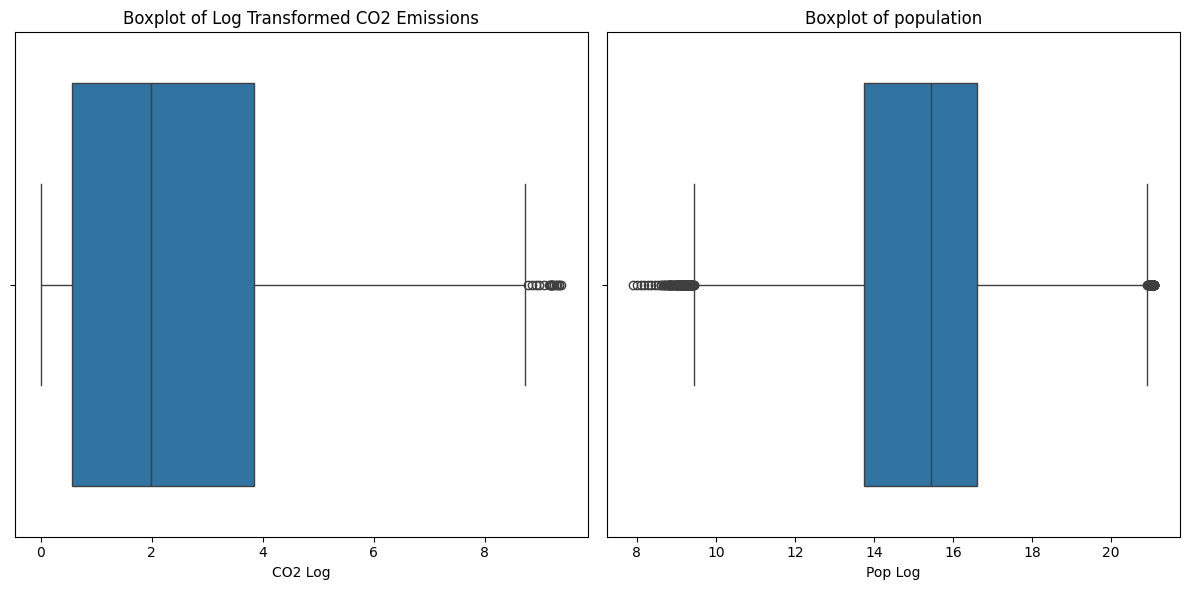

In [923]:
# Visualize again
# Visual inspection of data patterns
fig, axes = plt.subplots(1,2, figsize=(12,6))
axes = axes.flatten()

# Boxplot for co2
sns.boxplot(data=co2_by_country, x='CO2 Log', ax=axes[0])
axes[0].set_title('Boxplot of Log Transformed CO2 Emissions')

# Boxplot for population
sns.boxplot(data=co2_by_country, x='Pop Log', ax=axes[1])
axes[1].set_title('Boxplot of population')

plt.tight_layout()
plt.show()

In [924]:
# Flag extreme outliers of co2
extreme_outliers = co2_by_country['CO2 Log'].quantile(0.99)

# Update CO2 Outliers column to reflect flagging
co2_by_country.loc[co2_by_country['CO2 Log'] > extreme_outliers, 'CO2 Outliers'] = 'extreme'

co2_by_country['CO2 Outliers'].value_counts()

CO2 Outliers
False      11161
True        1497
extreme      128
Name: count, dtype: int64

In [925]:
# Flag outliers of population - critical for statistical modeling
population_low = co2_by_country['Pop Log'].quantile(0.01)
population_high = co2_by_country['Pop Log'].quantile(0.99)

# Create column to flag outliers
co2_by_country['Pop Outliers'] = 'not outlier'   # Default value
co2_by_country.loc[co2_by_country['Pop Log'] < population_low, 'Pop Outliers'] = 'low outlier'
co2_by_country.loc[co2_by_country['Pop Log'] > population_high, 'Pop Outliers'] = 'high outlier'

In [926]:
# Create bucket categories for population
bins = [0, 1e6, 10e6, 100e6, 1e9, float('inf')]
labels = ['<1M', '1M-10M', '10M-100M', '100M-1B', '1B+']
co2_by_country['Pop Category'] = pd.cut(co2_by_country['Population'], bins=bins, labels=labels)

# Preview changes to DataFrame
co2_by_country.head(3)

,Country Name,Country Code,Year,Population,CO2,CO2 Outliers,Per Capita CO2,Cumulative CO2,Emissions Category,CO2 Log,Pop Log,Pop Outliers,Pop Category
0,Afghanistan,AFG,1960,9035048.0,0.414,False,4.582156e-08,235.001,Moderate,0.346423,16.016622,not outlier,1M-10M
1,Afghanistan,AFG,1961,9214082.0,0.491,False,5.328800e-08,235.001,Moderate,0.399447,16.036244,not outlier,1M-10M
2,Afghanistan,AFG,1962,9404411.0,0.689,False,7.326349e-08,235.001,Moderate,0.524137,16.056689,not outlier,1M-10M


---

## CO_2 Data by Group
### Missing Data

In [927]:
co2_by_groups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 832 entries, 0 to 831
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           832 non-null    int64  
 1   Region/Group         832 non-null    object 
 2   Country Code         832 non-null    object 
 3   year                 832 non-null    int64  
 4   population           576 non-null    float64
 5   gdp                  14 non-null     float64
 6   co2                  832 non-null    float64
 7   co2_per_capita       832 non-null    float64
 8   co2_per_gdp          770 non-null    float64
 9   co2_per_unit_energy  767 non-null    float64
 10  energy_per_gdp       13 non-null     float64
dtypes: float64(7), int64(2), object(2)
memory usage: 71.6+ KB


In [928]:
# Missing data found - check how many exactly
print(co2_by_groups.isnull().sum())

Unnamed: 0               0
Region/Group             0
Country Code             0
year                     0
population             256
gdp                    818
co2                      0
co2_per_capita           0
co2_per_gdp             62
co2_per_unit_energy     65
energy_per_gdp         819
dtype: int64


In [929]:
# Drop redundant index column
co2_by_groups = co2_by_groups.drop(columns=["Unnamed: 0"])

# Rename columns for consistency with GDP data
co2_by_groups = co2_by_groups.rename(columns={
    "year": "Year",
    "population": "Population",
    'co2': 'CO2'
})
co2_by_groups.head(3)

,Region/Group,Country Code,Year,Population,gdp,CO2,co2_per_capita,co2_per_gdp,co2_per_unit_energy,energy_per_gdp
0,Africa,AFR,1960,283922289.0,NaN,156.567,0.552,0.345,NaN,NaN
1,Africa,AFR,1961,290814083.0,NaN,161.994,0.558,0.349,NaN,NaN
2,Africa,AFR,1962,297959967.0,NaN,166.335,0.559,0.346,NaN,NaN


In [930]:
# We can remove gdp-related columns from the OWID data 
#   because we will join with the World Bank data in the Joining phase
# Drop co2_per_unit_energy and co2_per_capita because these can be calculated later
co2_by_groups = co2_by_groups.drop(['gdp', 'co2_per_gdp', 'energy_per_gdp', 'co2_per_unit_energy', 'co2_per_capita'], axis=1)
print(co2_by_groups.isnull().sum())

Region/Group      0
Country Code      0
Year              0
Population      256
CO2               0
dtype: int64


In [931]:
# Investigate the missing population data
missing_co2_groups = co2_by_groups[co2_by_groups['Population'].isnull()]
display(missing_co2_groups.groupby('Region/Group')['Year'].count().sort_values(ascending=False))

Region/Group
Europe (excl. EU-27)         64
Europe (excl. EU-28)         64
European Union (28)          64
North America (excl. USA)    64
Name: Year, dtype: int64

#### Comments
These are political divisions that can be merged.

In [932]:
co2_by_groups['Region/Group'].unique()

array(['Africa', 'Asia', 'Asia (excl. China and India)', 'Europe',
       'Europe (excl. EU-27)', 'Europe (excl. EU-28)',
       'European Union (27)', 'European Union (28)', 'North America',
       'North America (excl. USA)', 'Oceania', 'South America', 'World'],
      dtype=object)

In [933]:
# Map political divisions to their main continent
region_map = {
    'Europe': 'Europe',
    'Europe (excl. EU-27)': 'Europe',
    'Europe (excl. EU-28)': 'Europe',
    'European Union (27)': 'Europe',
    'European Union (28)': 'Europe',

    'North America': 'North America',
    'North America (excl. USA)': 'North America',

    'Asia': 'Asia',
    'Asia (excl. China and India)': 'Asia',

    'Africa': 'Africa',
    'Oceania': 'Oceania',
    'South America': 'South America',
    'World': 'World',
}

co2_by_groups['Continent'] = co2_by_groups['Region/Group'].map(region_map)

co2_by_groups['Continent'].value_counts()

Continent
Europe           320
Asia             128
North America    128
Africa            64
Oceania           64
South America     64
World             64
Name: count, dtype: int64

In [934]:
# co2_by_groups = co2_by_groups.dropna(subset=['Population'])
print(co2_by_groups.isnull().sum())

Region/Group      0
Country Code      0
Year              0
Population      256
CO2               0
Continent         0
dtype: int64


In [935]:
# Verify where the missing population data lies
missing_pop = co2_by_groups[co2_by_groups['Population'].isna()]
missing_groups = missing_pop['Region/Group'].unique()
missing_groups

array(['Europe (excl. EU-27)', 'Europe (excl. EU-28)',
       'European Union (28)', 'North America (excl. USA)'], dtype=object)

In [936]:
# Aggregate population values to fill in the gaps
group_map = {
    'Europe (excl. EU-27)': 'Europe',
    'Europe (excl. EU-28)': 'Europe',
    'European Union (28)': 'Europe',

    'North America (excl. USA)': 'North America'
}

# Overwrite the current values
co2_by_groups['Region/Group'] = co2_by_groups['Region/Group'].replace(group_map)

# Aggregate population entries
aggregated = co2_by_groups.groupby(['Region/Group', 'Year'], as_index=False).agg({
    'Population': 'sum',
    'CO2': 'sum'
})

# Merge to fill in the missing values
co2_by_groups = co2_by_groups.drop(columns=['Population', 'CO2']) \
    .merge(aggregated, on=['Region/Group', 'Year'], how='left')

# Check missing values
print(co2_by_groups.isnull().sum())

Region/Group    0
Country Code    0
Year            0
Continent       0
Population      0
CO2             0
dtype: int64


### Duplicated Data

In [937]:
# Search for duplicate data
duplicates_groups = co2_by_groups[co2_by_groups.duplicated()]
duplicates_groups

,Region/Group,Country Code,Year,Continent,Population,CO2


### Outliers

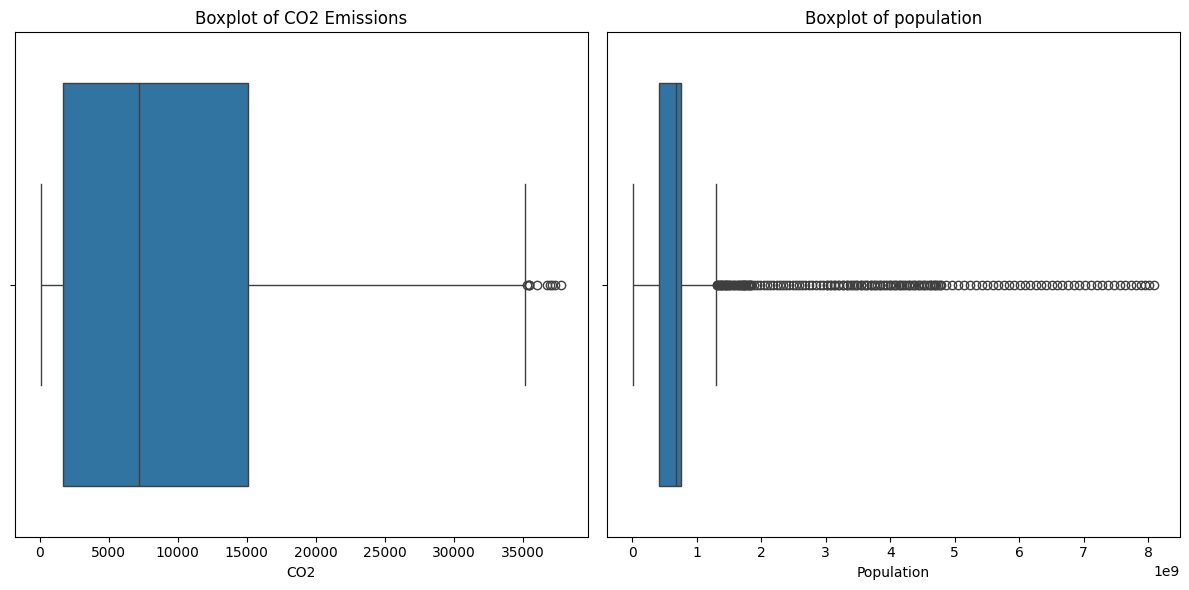

In [938]:
# Visual inspection of data patterns
fig, axes = plt.subplots(1,2, figsize=(12,6))
axes = axes.flatten()

# Boxplot for co2
sns.boxplot(data=co2_by_groups, x='CO2', ax=axes[0])
axes[0].set_title('Boxplot of CO2 Emissions')

# Boxplot for population
sns.boxplot(data=co2_by_groups, x='Population', ax=axes[1])
axes[1].set_title('Boxplot of population')

plt.tight_layout()
plt.show()

#### Comments
**Boxplots** reflect global differences in emissions and population data. Most regional and economic groups have low values, while some are exceptionally large or high-emitting. Because this dataset includes both regional and economic group data, groups will need to be categorized for further analysis.

#### Feature Engineering

In [939]:
# Basic per capital co2 calculation per country per year
co2_by_groups['Per Capita CO2'] = co2_by_groups['CO2'] / co2_by_groups['Population']

In [940]:
# Compute cumulative CO2 emissions by country
cumulative_co2 = co2_by_groups.groupby('Continent', as_index=False)['CO2'].sum()
cumulative_co2 = cumulative_co2.rename(columns={'CO2': "Cumulative CO2"})

# Merge cumulative into the DataFrame
co2_by_groups = co2_by_groups.merge(cumulative_co2, on="Continent", how='left')

In [941]:
# Add column to categorize level of emissions using quantile-based bins
# Get the max and nudge it just beyond the previous bin if needed
max_val = co2_by_groups['Cumulative CO2'].max()
adjusted_max = max(max_val, 1.00001e8)  # forces it to be strictly greater than 1e8

bins = [0, 1e6, 1e7, 1e8, adjusted_max]
labels = ['Low', 'Moderate', 'High', 'Very High']

co2_by_groups['Emissions Category'] = pd.cut(
    co2_by_groups['Cumulative CO2'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

In [942]:
# Add a column with Log transformation of co2 and population to soften skew
co2_by_groups['CO2 Log'] = np.log1p(co2_by_groups['CO2'])
co2_by_groups['Pop Log'] = np.log1p(co2_by_groups['Population'])

# Preview change to DataFrame
co2_by_groups.head(3)

,Region/Group,Country Code,Year,Continent,Population,CO2,Per Capita CO2,Cumulative CO2,Emissions Category,CO2 Log,Pop Log
0,Africa,AFR,1960,Africa,283922289.0,156.567,5.514431e-07,49714.657,Low,5.059851,19.464211
1,Africa,AFR,1961,Africa,290814083.0,161.994,5.570363e-07,49714.657,Low,5.093713,19.488195
2,Africa,AFR,1962,Africa,297959967.0,166.335,5.582461e-07,49714.657,Low,5.119998,19.512470


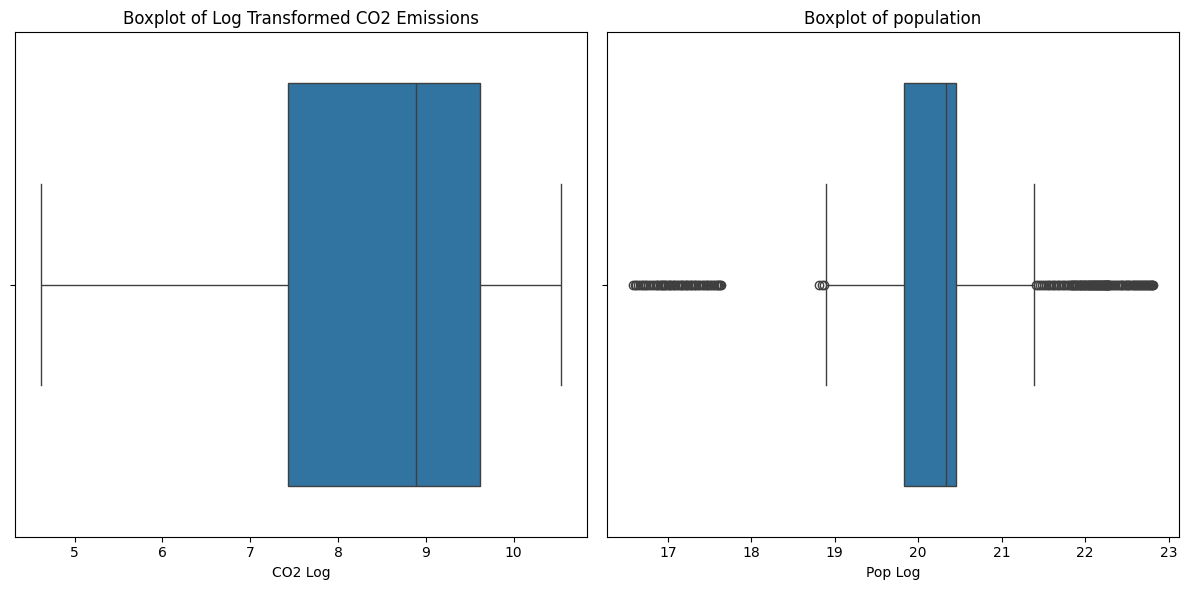

In [943]:
# Visualize again
# Visual inspection of data patterns
fig, axes = plt.subplots(1,2, figsize=(12,6))
axes = axes.flatten()

# Boxplot for co2
sns.boxplot(data=co2_by_groups, x='CO2 Log', ax=axes[0])
axes[0].set_title('Boxplot of Log Transformed CO2 Emissions')

# Boxplot for population
sns.boxplot(data=co2_by_groups, x='Pop Log', ax=axes[1])
axes[1].set_title('Boxplot of population')

plt.tight_layout()
plt.show()

In [944]:
# Flag outliers of population - critical for statistical modeling
population_low = co2_by_groups['Pop Log'].quantile(0.01)
population_high = co2_by_groups['Pop Log'].quantile(0.99)

# Create column to flag outliers
co2_by_groups['Pop Outliers'] = 'not outlier'   # Default value
co2_by_groups.loc[co2_by_groups['Pop Log'] < population_low, 'Pop Outliers'] = 'low outlier'
co2_by_groups.loc[co2_by_groups['Pop Log'] > population_high, 'Pop Outliers'] = 'high outlier'

In [945]:
# Create bucket categories for population
bins = [0, 1e6, 10e6, 100e6, 1e9, float('inf')]
labels = ['<1M', '1M-10M', '10M-100M', '100M-1B', '1B+']
co2_by_groups['Pop Category'] = pd.cut(co2_by_groups['Population'], bins=bins, labels=labels)

# Preview changes to DataFrame
co2_by_groups.head(3)

,Region/Group,Country Code,Year,Continent,Population,CO2,Per Capita CO2,Cumulative CO2,Emissions Category,CO2 Log,Pop Log,Pop Outliers,Pop Category
0,Africa,AFR,1960,Africa,283922289.0,156.567,5.514431e-07,49714.657,Low,5.059851,19.464211,not outlier,100M-1B
1,Africa,AFR,1961,Africa,290814083.0,161.994,5.570363e-07,49714.657,Low,5.093713,19.488195,not outlier,100M-1B
2,Africa,AFR,1962,Africa,297959967.0,166.335,5.582461e-07,49714.657,Low,5.119998,19.512470,not outlier,100M-1B


#### Comments
There are no outliers seen in the log-transformed CO2 emissions, but many outliers with the populations. To help with analysis, we will create a category for population to flag the outliers.

### Export Cleaned Data

In [ ]:
# Export cleaned CO2 data by country
# co2_by_country.to_csv("../data/in_process/2b_co2_by_country_cleaned.csv")

# Export cleaned CO2 data by group
# co2_by_groups.to_csv("../data/in_process/2b_co2_by_groups_cleaned.csv")